In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.style.use('default')

df=pd.read_csv('/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W8655_hour.csv',header=0,delimiter='\t', parse_dates=['datetime'])
df=df.set_index(['datetime'])
dwelling_id = 'P01S02W4953'

In [44]:
sample_rate = '1W'
def resample_df(df, sample_rate, combine_all_dwellings=False):
    """
    Resampled a (un)processed dataframe to the specified sample_rate.
    Input is a (un)processed df.
    Input df may also be multiple dwelling dfs combined.
    Sample rate must be a string. 
    For example '1H', '1D', '60s'.
    
    Combine all dwellings: resamples the df and ignores the fact that there are unique dwellings.
    
    TODO: add std to ePower, gasPower when combine_all_dwellings=False
    """
    def resample_dwelling(df, sample_rate, dwelling_id):
        df = df.resample(sample_rate).mean() # resample to rest by mean
        df['dwelling'] = dwelling_id
        return df
        
                      
    resampled_dwellings = []
    
    if combine_all_dwellings: # Ignore dwelling_ids
        df = df.drop(['eMeter', 'eMeterReturn', 'eMeterLow', 'eMeterLowReturn', 'gasMeter'], axis=1) # Drop columns because they are meaningless when ignoring dwelling ids
        resampled_df = resample_dwelling(df, sample_rate, 'All dwellings')
        resampled_dwellings.append(resampled_df)
    else:
        dwellings = df['dwelling'].unique() # Get dwelling ids
        for dwelling_id in tqdm(dwellings):
            dwelling_df = df[df['dwelling'] == dwelling_id] # Get the data from only that dwelling_id
            resampled_dwelling = resample_dwelling(dwelling_df, sample_rate, dwelling_id)
            resampled_dwellings.append(resampled_dwelling)
    
    resampled_df = pd.concat(resampled_dwellings)
    
    return resampled_df

rdf=resample_df(df,sample_rate)
trdf = rdf[rdf['T'] < 16]

100%|██████████| 1/1 [00:00<00:00, 195.06it/s]


In [45]:
rdf = rdf.reset_index()
rdf=rdf[np.isfinite(rdf['gasPower'])]
trdf=trdf[np.isfinite(trdf['gasPower'])]

In [46]:
trdf

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,gasPower,dwelling
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-30,796.895891,0.0,748.166615,0.0,391.150721,0.0,1609.625422,222.166582,35.947436,3.865200,...,0.080459,3.210664,8.045000,7.587350,2.990556,72.103205,35188.117609,12.744231,0.234331,P01S01W8655
2017-05-07,824.606274,0.0,777.659024,0.0,418.516398,0.0,1635.633762,116.799762,52.958333,4.248047,...,0.091528,1.442090,10.954603,10.734514,7.486696,79.646726,24377.014868,12.032540,0.115340,P01S01W8655
2017-05-14,855.160571,0.0,814.758482,0.0,352.286514,0.0,1652.708723,179.541825,30.090476,3.454574,...,0.076885,3.076877,12.257004,11.841766,7.705893,75.254365,24750.997071,10.795238,0.054865,P01S01W8655
2017-09-10,1263.874613,0.0,1210.066583,0.0,329.956729,0.0,1687.750726,215.519851,97.428571,4.701664,...,0.454891,1.147804,15.840754,15.319583,12.822579,82.440675,24061.177610,19.816171,0.014202,P01S01W8655
2017-09-17,1291.172929,0.0,1236.710619,0.0,257.616683,0.0,1692.563482,226.297024,140.842857,5.436164,...,0.516766,2.211112,13.071984,12.512113,10.022847,82.004266,28168.659758,27.981250,0.056566,P01S01W8655
2017-09-24,1317.741702,0.0,1256.496327,0.0,344.344213,0.0,1700.301405,192.239375,17.178571,2.412813,...,0.017500,2.892104,13.276200,12.330486,10.283661,83.002083,25693.173808,10.580258,0.030536,P01S01W8655
2017-10-01,1346.038661,0.0,1287.121429,0.0,356.278223,0.0,1706.401357,143.502530,23.880952,3.114339,...,0.098710,1.377057,14.684355,13.905873,12.504504,86.956052,13964.308940,12.823214,0.049792,P01S01W8655
2017-10-08,1374.484185,0.0,1314.682548,0.0,248.201476,0.0,1714.994821,267.089197,78.967857,5.780454,...,0.241230,1.352955,13.526458,12.967956,9.773750,78.098016,25859.854138,20.979365,0.056018,P01S01W8655
2017-10-15,1393.555327,0.0,1332.573387,0.0,252.319651,0.0,1725.287792,212.619415,15.242857,5.001679,...,0.058056,1.440136,14.676151,13.832272,12.120307,84.831845,23927.662742,8.429861,0.050286,P01S01W8655


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = trdf[['T']]
y = trdf[['gasPower']]

X = np.array(X).reshape(-1,1) # Reshape because sklearn wants you to
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
len(X_train)

10

In [49]:
model.score(X_test, y_test)

0.8962205143788643

In [50]:
print(model.get_params(deep=True))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


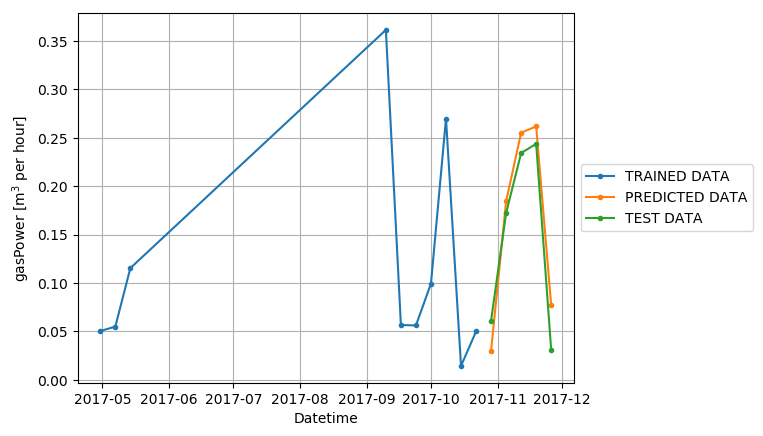

In [54]:
Y_prediction=model.predict(X_test)

plt.plot(trdf.index[:len(X_train)],y_train,'.-',label='TRAINED DATA')
plt.plot(trdf.index[10:15],Y_prediction,'.-',label='PREDICTED DATA')     
plt.plot(trdf.index[10:15],y_test,'.-',label='TEST DATA')

plt.grid(True)
plt.xlabel( 'Datetime' )
plt.ylabel('gasPower [m$^3$ per hour]')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()